<a href="https://colab.research.google.com/github/RashaAlshawi/NER-using-Deep-learning/blob/main/NER_Project_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ` Intelligently Predicting Viral Spillover Risks from Bats  and other Wild Mammals `     
🦇

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_recall_fscore_support,accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#virus ds 
data=pd.read_csv('/content/drive/MyDrive/viruses/viruses_dataset.csv')

In [ ]:
data=data.fillna(method='ffill')

In [ ]:
# change the label of the first column
from sklearn.preprocessing import LabelEncoder
data['sentence_id']=LabelEncoder().fit_transform(data['sentence_id'])

In [ ]:
# label info 
labels = data.label.unique()
labels

array(['O', 'B-VIRUS', 'I-VIRUS', 'B-HOST', 'I-HOST', 'B-DETECTIONMETHOD',
       'I-DETECTIONMETHOD'], dtype=object)

In [ ]:
label_to_ID = {}
for i, label in enumerate(labels):
    label_to_ID[label] = i
label_to_ID

{'B-DETECTIONMETHOD': 5,
 'B-HOST': 3,
 'B-VIRUS': 1,
 'I-DETECTIONMETHOD': 6,
 'I-HOST': 4,
 'I-VIRUS': 2,
 'O': 0}

In [ ]:
# for prediction #####
id2tag = {}
for i, j in label_to_ID.items():
    id2tag[j] = i

In [ ]:
#id2word, id2tag
id2tag

{0: 'O',
 1: 'B-VIRUS',
 2: 'I-VIRUS',
 3: 'B-HOST',
 4: 'I-HOST',
 5: 'B-DETECTIONMETHOD',
 6: 'I-DETECTIONMETHOD'}

In [ ]:
# map the IOB labels into numbers
data['labels_ids']=(data['label'].map(label_to_ID))

In [ ]:
#Group each sentence in one list 
pre_data=data.groupby(
    ['sentence_id'],as_index=False)['label','labels_ids'].agg(lambda x:list(x)) # agg query apply on the groupby

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Group each sentence in one list 
pre_data1=data.groupby(['sentence_id'],as_index=False)['word'].agg(lambda x:' '.join(x)) # agg query apply on the groupby

In [ ]:
pre_data['words']=pre_data1['word']

In [ ]:
pre_data.head(1)

,sentence_id,label,labels_ids,words
0,0,"[O, O, O, O, O, O, O, O, O, B-VIRUS, O, O, O, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",To determine whether transplacental transmissi...


In [ ]:
print(pre_data['labels'][0],end='')

In [ ]:
print(len(np.unique(pre_data['labels_ids'])))
len(np.unique(pre_data['label']))

406


406

In [ ]:
def num_labels (labels, data):
    label_count = {}
    for label in labels:
        len_label = len(data[data['label'] == label])
        label_count[label] = len_label
    
    return label_count

In [ ]:
labels_count = num_labels(labels, data)
labels_count

{'B-DETECTIONMETHOD': 839,
 'B-HOST': 2102,
 'B-VIRUS': 2883,
 'I-DETECTIONMETHOD': 157,
 'I-HOST': 671,
 'I-VIRUS': 1414,
 'O': 88674}

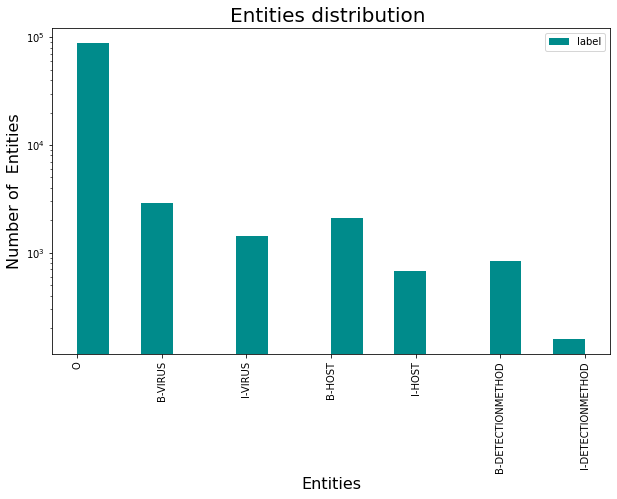

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(data.label, log = True, label = 'label', color = 'darkcyan', bins = 16)
plt.xlabel('Entities', fontsize = 16)
plt.ylabel('Number of  Entities', fontsize = 16)
plt.title("Entities distribution ", fontsize = 20)
plt.grid(alpha=0.0)
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X=pre_data['words']

In [ ]:
y=pre_data['labels_ids']

In [ ]:
print(pre_data['label'][4],end='')

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-VIRUS', 'I-VIRUS', 'I-VIRUS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-HOST', 'I-HOST', 'B-HOST', 'I-HOST', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DETECTIONMETHOD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DETECTIONMETHOD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DETECTIONMETHOD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-HOST', 'I-HOST', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DETECTIONMETHOD', 'O', 'O', 'O

In [ ]:
len(X[100].split()),len(y[100])

(303, 303)

In [ ]:
print('sampele from x:',X[0])
print('Its label:',y[0])

sampele from x: To determine whether transplacental transmission could explain overwintering of bluetongue virus in the United Kingdom we studied calves born to dams naturally infected during pregnancy Approximately were infected transplacentally some had compromised health In all infected calves viral load decreased after birth no evidence of persistent infection was found
Its label: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Tokenization and padding

In [ ]:
# 1. for the trainig data
max_word=data.word.nunique()
maxlen = len((max((X), key=lambda x: len(x.split()))).split())
print("Number of unique words in the dataset: {}".format(max_word))

Number of unique words in the dataset: 9629


In [ ]:
maxlen

384

In [ ]:
tokenizer=Tokenizer(num_words=max_word,oov_token='<OOV>') # using the maximum number in our data to aviod lossing any. 
tokenizer.fit_on_texts(X)

In [ ]:
seq=tokenizer.texts_to_sequences(X)

In [ ]:
# will need it later for prediction 
word2id = tokenizer.word_index

In [ ]:
word2id

In [ ]:
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

In [ ]:
id2word

In [ ]:
X_p=pad_sequences(seq,padding='post',maxlen=maxlen)

 preprocess labels by assigning a unique identifier for each one of them.

labels have different lenghts, to solve this 

We can assign a new tag for the zeros that we used in padding
We can use the O tag for them.

In [ ]:
y_p=pad_sequences(y,padding='post',maxlen=maxlen)

In [ ]:
print("Before Padding:",len(y[0]),len(y[8]))
print("After Padding:",len(y_p[0]),len(y_p[8]))

Before Padding: 49 135
After Padding: 432 432


In [ ]:
X_p.shape,y_p.shape

((524, 432), (524, 432))

In [ ]:
#Split the data

In [ ]:
# 85% train and validation,    15% for test
samples_train=int(len(X)*0.80)

In [ ]:
from sklearn.utils import shuffle
X_s,y_s=shuffle(X_p,y_p,random_state=0)

In [ ]:
X_train=X_p[:samples_train]
y_train=y_p[:samples_train]
X_test=X_p[samples_train:]
y_test=y_p[samples_train:]
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((450, 432), (450, 432)), ((74, 432), (74, 432)))

In [ ]:
embedding_dim = 150
max_words = 36000
num_tags=len(labels)

## Models   
1. LSTM
2. Transformer 

In [ ]:
## 1.  basic LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

In [ ]:
#2. Transformer
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.ffn = keras.Sequential(
            [
                keras.layers.Dense(ff_dim, activation="relu"),
                keras.layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = keras.layers.Dropout(rate)
        self.dropout2 = keras.layers.Dropout(rate)

    def call(self, inputs, training=True):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.pos_emb = keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.pos_emb(positions)
        token_embeddings = self.token_emb(inputs)
        return token_embeddings + position_embeddings


In [ ]:
def ner_transformer(num_tags,vocab_size,maxlen=128, embed_dim=32, num_heads=2, units=32,dropout_rate=0.1):

  inputs=keras.layers.Input(shape=(maxlen,),dtype='int32')
  embedding= TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)(inputs)
  transformer_block = TransformerBlock(embed_dim, num_heads, units)(embedding)
  x = layers.Dropout(dropout_rate)(transformer_block)
  x=layers.Dense(units, activation="relu")(x)
  x = layers.Dropout(dropout_rate)(x)
  y = layers.Dense(num_tags, activation="softmax")(x)
  model=keras.Model(inputs=[inputs],outputs=[y])
  return model


In [ ]:
model = ner_transformer(num_tags, max_words, maxlen,embed_dim=embedding_dim, num_heads=4, units=64)

In [ ]:
model.build(input_shape=[None,maxlen])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 432)]             0         
                                                                 
 token_and_position_embeddin  (None, 432, 150)         5464800   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 432, 150)         381964    
 merBlock)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 432, 150)          0         
                                                                 
 dense_2 (Dense)             (None, 432, 64)           9664      
                                                             

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy']) #metric

In [ ]:
%tensorboard --logdir logs

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=20,batch_size=15)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 2s 35ms/step - loss: 0.6036 - accuracy: 0.8439 - val_loss: 0.2377 - val_accuracy: 0.9570
Epoch 2/20
24/24 [==============================] - 1s 22ms/step - loss: 0.2112 - accuracy: 0.9650 - val_loss: 0.2182 - val_accuracy: 0.9574
Epoch 3/20
24/24 [==============================] - 1s 21ms/step - loss: 0.1888 - accuracy: 0.9650 - val_loss: 0.1978 - val_accuracy: 0.9573
Epoch 4/20
24/24 [==============================] - 1s 21ms/step - loss: 0.1738 - accuracy: 0.9650 - val_loss: 0.1868 - val_accuracy: 0.9575
Epoch 5/20
24/24 [==============================] - 1s 22ms/step - loss: 0.1604 - accuracy: 0.9654 - val_loss: 0.1754 - val_accuracy: 0.9577
Epoch 6/20
24/24 [==============================] - 1s 21ms/step - loss: 0.1475 - accuracy: 0.9659 - val_loss: 0.1654 - val_accuracy: 0.9585
Epoch 7/20
24/24 [==============================] - 1s 22ms/step - loss: 0.1357 - accuracy: 0.9666 - val_loss: 0.1557 - val_accuracy: 0.9597
Epoch 8/20
24/24 [======

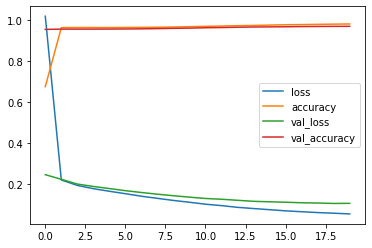

In [ ]:
pd.DataFrame(history.history).plot()

Perform the same steps on the test data

## Evaluation and Prediction

In [ ]:
model.evaluate(X_test,y_test)

1/3 [=========>....................] - ETA: 0s - loss: 0.0613 - accuracy: 0.9823

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 0s 15ms/step - loss: 0.0625 - accuracy: 0.9827


[0.062450848519802094, 0.9826701879501343]

In [ ]:
p=model.predict([X_test])

In [ ]:
y_predict=np.zeros((y_test.shape[0],y_test.shape[1]),dtype=np.int32)
for i in range(len(y_test)):
  y_predict[i,:]=np.argmax(p[i], axis=1)

In [ ]:
def compute_metric(y_test,y_predict):
  P=0
  R=0
  F=0
  for i in range(y_test.shape[0]):
      precision, recall, f1, _ = precision_recall_fscore_support(y_test[i], y_predict[i], average='weighted', labels=np.unique(y_test))
      P+=precision
      R+=recall
      F+=f1
  return {
      'Precision':P/y_predict.shape[0],
      'Recall':R/y_predict.shape[0],
      'F1-Score':F/y_predict.shape[0]}



In [ ]:
compute_metric(y_test,y_predict)

In [ ]:
{'F1-Score': 0.9795434714157091,
 'Precision': 0.9793462923964108,
 'Recall': 0.9826701701701706}

## Results

In [ ]:
def ner_prediction(model, x_test, id2word, id2tag):
    
    #reshape to tf shape:
    x_test = x_test.reshape((1, maxlen))

    # return x_test to its words form
    sentence = x_test[x_test > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)
    
    len_orginal_sententce = len(word_list)
    
    # make prediction
    prediction = model.predict(x_test)
    prediction = np.argmax(prediction[0], axis=1)
    
    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce] 
    
    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])
    
    return orginal_sententce,  pred_tag_list,prediction


In [ ]:
orginal_sententce,  pred_tag_list,prediction = ner_prediction(model=model,
                                                    x_test=X_test[1],    #8
                                                    id2word=id2word,
                                                    id2tag=id2tag)


### To do:    
1. build a function to high the entities
2.

In [ ]:
!pip install colorama

In [ ]:
from colorama import Fore, Back, Style

In [ ]:
print(Back.GREEN + 'and with a green background')

and with a green background


In [ ]:
#on_red, on_green, on_yellow, on_blue, on_magenta, on_cyan, on_white.

print((colored('foot and mouth','white','on_cyan',attrs=['bold'])) + colored(' B-VIRUS','yellow','on_cyan') )

foot and mouth B-VIRUS


In [ ]:
# edit this later " render function"
from termcolor import colored
t=orginal_sententce.lower().split()
k=17
for i,j in enumerate(pred_tag_list):
  if j != 'O':   
    x=t[i]
    sys.stdout.write((colored(x,'magenta','on_white',attrs=['bold'])) +colored('('+j+')','cyan','on_white') +' ') 
  else: sys.stdout.write(t[i]+' ')   # join them 
  if i in range(11, len(t),13) :
     sys.stdout.write('\n')


human(B-HOST) antibodies(B-DETECTIONMETHOD) protect against aerosolized eastern equine(B-VIRUS) encephalitis virus infection eastern equine(B-VIRUS) 
encephalitis(I-VIRUS) virus eeev is one of the most virulent viruses endemic to north 
america no licensed vaccines or antiviral therapeutics are available to combat this infection 
which has recently shown an increase in human(B-HOST) cases here we characterize human(B-HOST) 
monoclonal antibodies(B-DETECTIONMETHOD) mabs isolated(B-DETECTIONMETHOD) from a survivor of natural eeev infection with potent 
pm inhibitory activity of eeev cryo electron microscopy reconstructions of two highly neutralizing 
mabs eeev and eeev were solved in complex with chimeric sindbis(B-VIRUS) eeev virions 
to and respectively the mabs recognize two distinct antigenic sites that are critical 
for inhibiting viral entry into cells eeev and eeev protect against disease following 
stringent lethal aerosol challenge of mice(B-HOST) with highly pathogenic eeev the